# Project Description & Limitations

The project is inspired from the idea of being able to build a system to accuractly predict the entry and exit point being a day trader. The limitation of the project is that we are using a set of 10 indicators to predict our model. The api that we are using is from Yahoo Finance which update on a daily basis. Hence, we are not able to predict the entry and exit point on a live prices.

1. Moving Averages (MA): Moving averages smooth out price data and help identify trends. Common types are Simple Moving Averages (SMA) and Exponential Moving Averages (EMA).

2. Moving Average Convergence Divergence (MACD): The MACD is a momentum indicator that shows the relationship between two moving averages of an asset's price. It can be used to identify potential buy or sell signals.

3. Relative Strength Index (RSI): The RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100, with overbought and oversold levels typically set at 70 and 30, respectively.

4. Bollinger Bands: Bollinger Bands are a volatility indicator that uses a moving average and standard deviations to create an upper and lower band. When the bands are tight, it may indicate a period of low volatility, which could be followed by a significant price movement.

5. Volume: Analyzing trading volume can help determine the strength or weakness of a market move. A strong move accompanied by high volume might indicate a strong trend, while low volume might suggest a weak trend or a lack of conviction among traders.

6. Stochastic Oscillator: This momentum indicator compares the closing price of an asset to the range of its prices over a specified period. It can help identify overbought or oversold conditions.

7. Fibonacci Retracement: Fibonacci retracement levels are used to identify potential support and resistance levels based on the Fibonacci sequence. Traders often look for potential reversal points at these levels, which can be drawn by connecting significant price highs and lows on a chart.

8. Pivot Points: Pivot points are calculated using the high, low, and closing prices of the previous day's trading session. They help identify potential support and resistance levels and can be used as entry or exit points for trades.

9. Ichimoku Cloud: The Ichimoku Cloud is a comprehensive indicator that combines trend, momentum, and support/resistance information. It provides a visual representation of multiple data points, such as the conversion line, base line, leading span A, leading span B, and lagging span.

10. Average True Range (ATR): The ATR is a volatility indicator that measures the degree of price movement over a specified period. It can help traders set stop-loss orders and determine the potential risk associated with a trade.

# 1. Importing modules needed to run the project

This script fetches Tesla stock prices between the specified start and end dates using the yfinance library and plots the closing prices using matplotlib. You can customize the date range and the ticker symbol as needed.

In [8]:
pip install pandas matplotlib yfinance


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas numpy matplotlib ta

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta
import yfinance as yf

# 2. Fetching ticker symbols of S&P500

In [19]:
def get_sp500_tickers():
    # Scrape the Wikipedia page for S&P 500 companies
    sp500_wikipedia_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    sp500_table = pd.read_html(sp500_wikipedia_url, header=0)[0]

    # Extract the ticker symbols and company names from the table
    ticker_symbols = sp500_table['Symbol'].tolist()
    company_names = sp500_table['Security'].tolist()
    return list(zip(ticker_symbols, company_names))

def get_company_info(ticker_symbol):
    # Fetch the company information using yfinance
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract the company name and description from the information
    name = info.get('longName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')

    return name, description

if __name__ == "__main__":
    sp500_tickers_and_names = get_sp500_tickers()
    for ticker, name in sp500_tickers_and_names:
        print(f"Ticker: {ticker}")
        print(f"Name: {name}")

        company_name, company_description = get_company_info(ticker)
       


Ticker: MMM
Name: 3M
Ticker: AOS
Name: A. O. Smith
Ticker: ABT
Name: Abbott
Ticker: ABBV
Name: AbbVie
Ticker: ACN
Name: Accenture
Ticker: ATVI
Name: Activision Blizzard
Ticker: ADM
Name: ADM
Ticker: ADBE
Name: Adobe Inc.
Ticker: ADP
Name: ADP
Ticker: AAP
Name: Advance Auto Parts
Ticker: AES
Name: AES Corporation
Ticker: AFL
Name: Aflac
Ticker: A
Name: Agilent Technologies
Ticker: APD
Name: Air Products and Chemicals
Ticker: AKAM
Name: Akamai
Ticker: ALK
Name: Alaska Air Group
Ticker: ALB
Name: Albemarle Corporation
Ticker: ARE
Name: Alexandria Real Estate Equities
Ticker: ALGN
Name: Align Technology
Ticker: ALLE
Name: Allegion
Ticker: LNT
Name: Alliant Energy
Ticker: ALL
Name: Allstate
Ticker: GOOGL
Name: Alphabet Inc. (Class A)
Ticker: GOOG
Name: Alphabet Inc. (Class C)
Ticker: MO
Name: Altria
Ticker: AMZN
Name: Amazon
Ticker: AMCR
Name: Amcor
Ticker: AMD
Name: AMD
Ticker: AEE
Name: Ameren
Ticker: AAL
Name: American Airlines Group
Ticker: AEP
Name: American Electric Power
Ticker: AXP


KeyboardInterrupt: 

# 3. Fetching stock information & printing graph

[*********************100%***********************]  1 of 1 completed


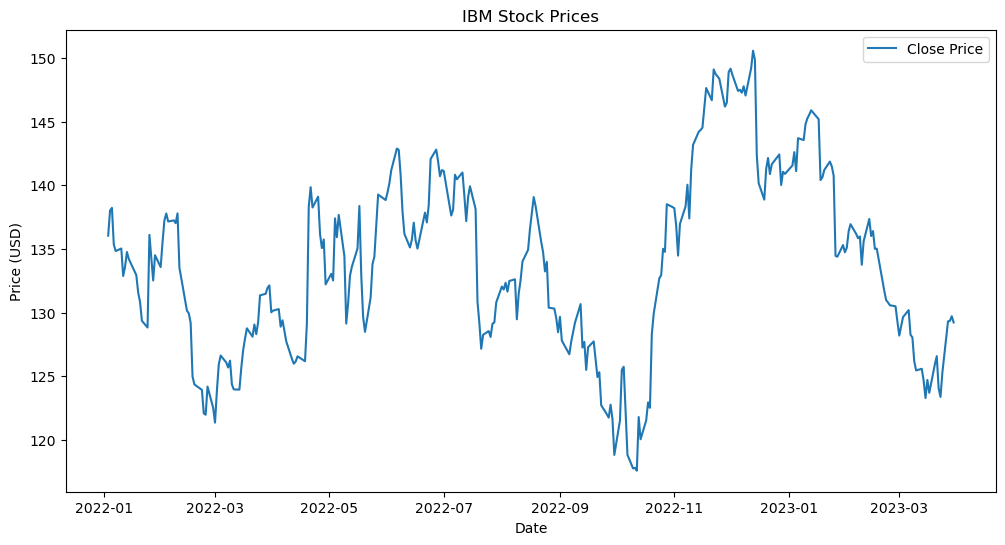

In [20]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def plot_stock_prices(stock_data, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'{ticker} Stock Prices')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker = 'IBM'
    start_date = '2022-01-01'
    end_date = '2023-03-31'

    stock_data = fetch_stock_data(ticker, start_date, end_date)
    plot_stock_prices(stock_data, ticker)


[*********************100%***********************]  1 of 1 completed


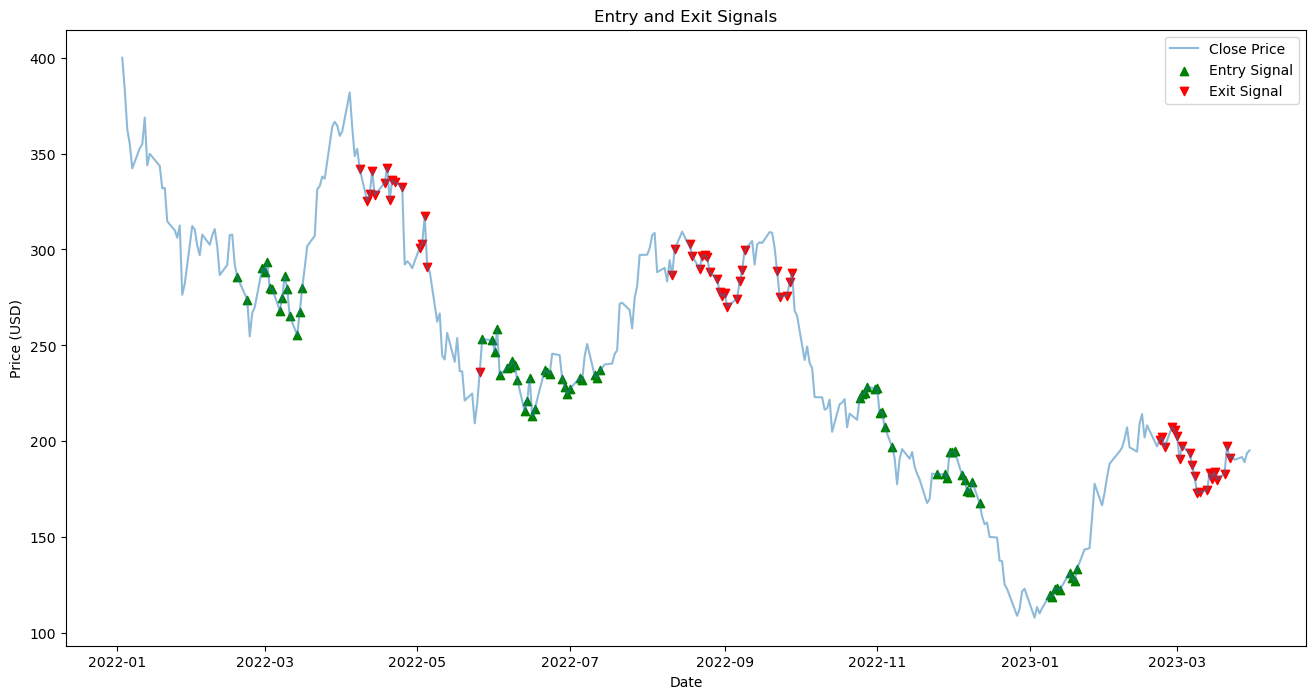

In [21]:
def generate_signals(df):
    entry_signals = []
    exit_signals = []

    # Define your entry and exit conditions based on the indicators
    for i in range(len(df)):
        # Entry conditions
        if (
            df['rsi'][i] < 50 and
            df['macd_signal_diff'][i] > 0
        ):
            entry_signals.append(df['Close'][i])
            exit_signals.append(np.nan)
        # Exit conditions
        elif (
            df['rsi'][i] > 40 and
            df['macd_signal_diff'][i] < 0
        ):
            entry_signals.append(np.nan)
            exit_signals.append(df['Close'][i])
        else:
            entry_signals.append(np.nan)
            exit_signals.append(np.nan)

    return entry_signals, exit_signals


def plot_signals(df):
    plt.figure(figsize=(16, 8))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.scatter(df.index, df['entry_signal'], label='Entry Signal', marker='^', color='g')
    plt.scatter(df.index, df['exit_signal'], label='Exit Signal', marker='v', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Entry and Exit Signals')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Assume `stock_data` is a pandas DataFrame containing historical stock data
    stock_data = fetch_stock_data('TSLA', '2022-01-01', '2023-03-31')

    # Calculate the indicators
    stock_data['sma_50'] = ta.trend.SMAIndicator(stock_data['Close'], window=50).sma_indicator()
    stock_data['ema_21'] = ta.trend.EMAIndicator(stock_data['Close'], window=21).ema_indicator()
    stock_data['rsi'] = ta.momentum.RSIIndicator(stock_data['Close']).rsi()
    stock_data['macd'] = ta.trend.MACD(stock_data['Close']).macd()
    stock_data['macd_signal'] = ta.trend.MACD(stock_data['Close']).macd_signal()
    stock_data['macd_signal_diff'] = stock_data['macd'] - stock_data['macd_signal']
    bollinger_bands = ta.volatility.BollingerBands(stock_data['Close'])
    stock_data['upper_band'] = bollinger_bands.bollinger_hband()
    stock_data['middle_band'] = bollinger_bands.bollinger_mavg()
    stock_data['lower_band'] = bollinger_bands.bollinger_lband()
    stoch_osc = ta.momentum.StochasticOscillator(stock_data['High'], stock_data['Low'], stock_data['Close'])
    stock_data['stoch_k'] = stoch_osc.stoch()
    stock_data['stoch_d'] = stoch_osc.stoch_signal()
    stock_data['stoch_signal'] = np.where(stock_data['stoch_k'] > stock_data['stoch_d'], 1, -1)
    #stock_data['fibonacci_retracement'] = ta.utils.FibonacciRetracement(stock_data['Close'])
    #stock_data['pivot_points'] = ta.pivot_points.PivotPoints(stock_data['High'], stock_data['Low'], stock_data['Close'], method='standard').pivot_points()
    stock_data['atr'] = ta.volatility.AverageTrueRange(stock_data['High'], stock_data['Low'], stock_data['Close']).average_true_range()
    #ichimoku = ta.trend.IchimokuIndicator(stock_data['High'], stock_data['Low'], stock_data['Close'], n1=9, n2=26, n3=52, visual=False, fillna=False)
    #stock_data['ichimoku_a'] = ichimoku.ichimoku_a()
    #stock_data['ichimoku_b'] = ichimoku.ichimoku_b()


    # Generate entry and exit signals
    stock_data['entry_signal'], stock_data['exit_signal'] = generate_signals(stock_data)

    # Plot the entry and exit signals
    plot_signals(stock_data)



In [34]:
def generate_complex_signals(df):
    entry_signals = []
    exit_signals = []

    # Define your entry and exit conditions based on the indicators
    for i in range(len(df)):
        # Entry conditions
        if (
            #df['Close'][i] > df['sma_50'][i] and
            #df['Close'][i] > df['ema_21'][i] and
            df['rsi'][i] < 50 and
            df['macd_signal_diff'][i] > 0 and
            df['stoch_k'][i] > df['stoch_d'][i] and
            df['stoch_signal'][i] == 1
        ):
            entry_signals.append(df['Close'][i])
            exit_signals.append(np.nan)
        # Exit conditions
        elif (
            #df['Close'][i] < df['sma_50'][i] and
            #df['Close'][i] < df['ema_21'][i] and
            df['rsi'][i] > 40 and
            df['macd_signal_diff'][i] < 0 and
            df['stoch_k'][i] < df['stoch_d'][i] and
            df['stoch_signal'][i] == -1
        ):
            entry_signals.append(np.nan)
            exit_signals.append(df['Close'][i])
        else:
            entry_signals.append(np.nan)
            exit_signals.append(np.nan)

    return entry_signals, exit_signals



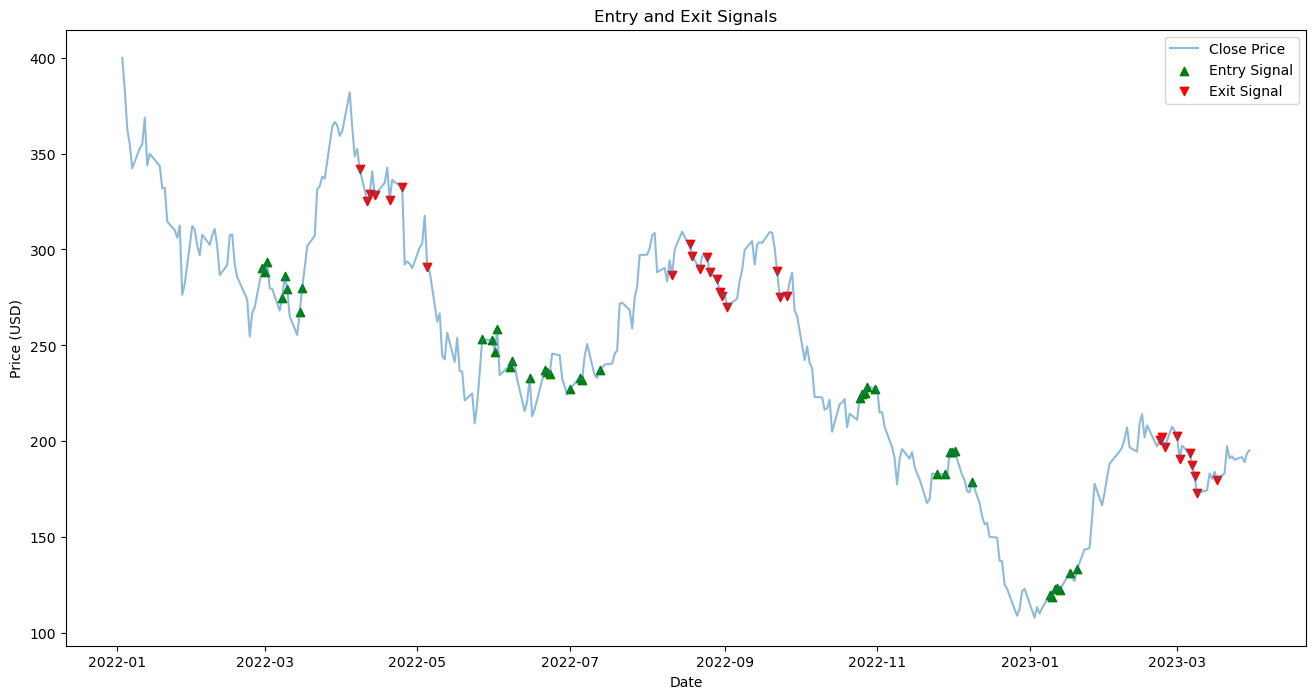

In [35]:
    # Generate entry and exit signals
    stock_data['entry_signal'], stock_data['exit_signal'] = generate_complex_signals(stock_data)

    # Plot the entry and exit signals
    plot_signals(stock_data)

# 4. Checking company's financial health

In [37]:
# Set the ticker symbol of the company
ticker = "AAPL"

# Fetch the company's financial statements
income_statement = yf.Ticker(ticker).financials.loc["Total Revenue"]
balance_sheet = yf.Ticker(ticker).balance_sheet
cash_flow = yf.Ticker(ticker).cashflow

# Calculate key financial ratios
revenue_growth = income_statement.pct_change().iloc[-1] * 100
profit_margin = (income_statement.iloc[-1] / revenue.iloc[-1]) * 100
return_on_assets = (income_statement.iloc[-1] / balance_sheet.loc["Total Assets"].iloc[-1]) * 100
return_on_equity = (income_statement.iloc[-1] / balance_sheet.loc["Total Stockholder Equity"].iloc[-1]) * 100
debt_to_equity = (balance_sheet.loc["Total Liabilities"].iloc[-1] / balance_sheet.loc["Total Stockholder Equity"].iloc[-1]) * 100
current_ratio = balance_sheet.loc["Total Current Assets"].iloc[-1] / balance_sheet.loc["Total Current Liabilities"].iloc[-1]

# Print the financial ratios
print(f"Revenue Growth: {revenue_growth:.2f}%")
print(f"Profit Margin: {profit_margin:.2f}%")
print(f"Return on Assets: {return_on_assets:.2f}%")
print(f"Return on Equity: {return_on_equity:.2f}%")
print(f"Debt to Equity: {debt_to_equity:.2f}%")
print(f"Current Ratio: {current_ratio:.2f}")


Exception: yfinance failed to decrypt Yahoo data response